In [1]:
import pandas as pd
import numpy as np
from ta import *
nas_df = pd.read_csv('NASDAQ_technical_indicator_labels.csv')

In [2]:
test_year_dates = ['2018-08-01','2019-08-30']
t1year = ['2017-07-03','2018-07-30']
t5year = ['2013-07-01','2018-07-30']

# train_type should be ['1_year','5_year','all']
def get_recent_test_train(df, train_type):
    try:
        df = df.set_index('Date')
    except:
        pass
    test = df.loc[test_year_dates[0]:test_year_dates[1]]
    if train_type == '1_year':
        train = df.loc[t1year[0]:t1year[1]]
    elif train_type == '5_year':
        train = df.loc[t5year[0]:t5year[1]]
    elif train_type == 'all':
        train = df.loc[:t1year[1]]
    else:
        print("train_type must be one of the following:")
        print('1_year, ','5_year, ','or all')
        return(0,0)
    return(train, test)

In [3]:
!pip install sklearn

In [4]:
X = nas_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = nas_df['nas_labels']
train_data_1year_nas, test_data_1year_nas = get_recent_test_train(nas_df, '1_year')
X_train_1year_nas = train_data_1year_nas[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_1year_nas = test_data_1year_nas[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_1year_nas = train_data_1year_nas[['nas_labels']]
y_test_1year_nas = test_data_1year_nas[['nas_labels']]

In [5]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train_1year_nas, y_train_1year_nas)

y_predict = model.predict(X_test_1year_nas)

In [6]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_1year_nas, y_predict)

0.4175824175824176

In [7]:
tree.export_graphviz(model, out_file='1year_nas_tree.dot', feature_names=X.columns)

In [8]:
# from subprocess import call
# !pip install pydot
# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
!pip3 install pygraphviz
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
Gtmp = pgv.AGraph('1year_nas_tree.dot')
G = nx.Graph(Gtmp)
nx.draw(G)
plt.show()

/bin/sh: 1: pip3: not found


<Figure size 640x480 with 1 Axes>

In [9]:
import pydot

(graph,) = pydot.graph_from_dot_file('1year_nas_tree.dot')
graph.write_png('1year_nas_decisiontree.png')

In [10]:
X = nas_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = nas_df['nas_labels']
train_data_5year_nas, test_data_5year_nas = get_recent_test_train(nas_df, '5_year')
X_train_5year_nas = train_data_5year_nas[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_5year_nas = test_data_5year_nas[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_5year_nas = train_data_5year_nas[['nas_labels']]
y_test_5year_nas = test_data_5year_nas[['nas_labels']]

In [11]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train_5year_nas, y_train_5year_nas)

y_predict = model.predict(X_test_5year_nas)

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_5year_nas, y_predict)

0.4432234432234432

In [13]:
tree.export_graphviz(model, out_file='5year_nas_tree.dot', feature_names=X.columns)

/bin/sh: 1: pip3: not found


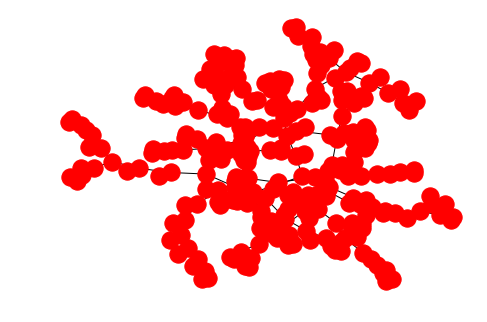

In [14]:
# from subprocess import call
# !pip install pydot
# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
!pip3 install pygraphviz
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
Gtmp = pgv.AGraph('5year_nas_tree.dot')
G = nx.Graph(Gtmp)
nx.draw(G)
plt.show()

In [15]:
import pydot

(graph,) = pydot.graph_from_dot_file('5year_nas_tree.dot')
graph.write_png('5year_nas_decisiontree.png')

In [16]:
X = nas_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = nas_df['nas_labels']
train_data_all_nas, test_data_all_nas = get_recent_test_train(nas_df, 'all')
X_train_all_nas = train_data_all_nas[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_all_nas = test_data_all_nas[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_all_nas = train_data_all_nas[['nas_labels']]
y_test_all_nas = test_data_all_nas[['nas_labels']]

In [17]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train_all_nas, y_train_all_nas)

y_predict = model.predict(X_test_all_nas)

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_all_nas, y_predict)

0.4652014652014652

In [19]:
tree.export_graphviz(model, out_file='all_nas_tree.dot', feature_names=X.columns)

/bin/sh: 1: pip3: not found


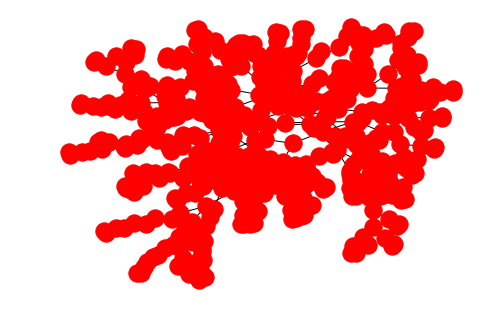

In [20]:
# from subprocess import call
# !pip install pydot
# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
!pip3 install pygraphviz
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
Gtmp = pgv.AGraph('all_nas_tree.dot')
G = nx.Graph(Gtmp)
nx.draw(G)
plt.show()

In [21]:
import pydot

(graph,) = pydot.graph_from_dot_file('all_nas_tree.dot')
graph.write_png('all_nas_decisiontree.png')

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = nas_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = nas_df['nas_labels']
train_data_1year_nas, test_data_1year_nas = get_recent_test_train(nas_df, '1_year')
X_train_1year_nas = train_data_1year_nas[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_1year_nas = test_data_1year_nas[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_1year_nas = train_data_1year_nas[['nas_labels']]
y_test_1year_nas = test_data_1year_nas[['nas_labels']]

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_1year_nas, y_train_1year_nas.values.ravel())
y_pred = model.predict(X_test_1year_nas)

print(confusion_matrix(y_test_1year_nas,y_pred))
print(classification_report(y_test_1year_nas,y_pred))
print(accuracy_score(y_test_1year_nas, y_pred))

[[27  4 76]
 [ 7  2 27]
 [38  5 87]]
              precision    recall  f1-score   support

        -1.0       0.38      0.25      0.30       107
         0.0       0.18      0.06      0.09        36
         1.0       0.46      0.67      0.54       130

   micro avg       0.42      0.42      0.42       273
   macro avg       0.34      0.33      0.31       273
weighted avg       0.39      0.42      0.39       273

0.4249084249084249


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = nas_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = nas_df['nas_labels']
train_data_5year_nas, test_data_5year_nas = get_recent_test_train(nas_df, '5_year')
X_train_5year_nas = train_data_5year_nas[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_5year_nas = test_data_5year_nas[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_5year_nas = train_data_5year_nas[['nas_labels']]
y_test_5year_nas = test_data_5year_nas[['nas_labels']]

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_5year_nas, y_train_5year_nas.values.ravel())
y_pred = model.predict(X_test_5year_nas)

print(confusion_matrix(y_test_5year_nas,y_pred))
print(classification_report(y_test_5year_nas,y_pred))
print(accuracy_score(y_test_5year_nas, y_pred))

[[23  3 81]
 [ 9  1 26]
 [30  2 98]]
              precision    recall  f1-score   support

        -1.0       0.37      0.21      0.27       107
         0.0       0.17      0.03      0.05        36
         1.0       0.48      0.75      0.59       130

   micro avg       0.45      0.45      0.45       273
   macro avg       0.34      0.33      0.30       273
weighted avg       0.40      0.45      0.39       273

0.4468864468864469


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = nas_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = nas_df['nas_labels']
train_data_all_nas, test_data_all_nas = get_recent_test_train(nas_df, 'all')
X_train_all_nas = train_data_all_nas[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_all_nas = test_data_all_nas[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_all_nas = train_data_all_nas[['nas_labels']]
y_test_all_nas = test_data_all_nas[['nas_labels']]

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_all_nas, y_train_all_nas.values.ravel())
y_pred = model.predict(X_test_all_nas)

print(confusion_matrix(y_test_all_nas,y_pred))
print(classification_report(y_test_all_nas,y_pred))
print(accuracy_score(y_test_all_nas, y_pred))

[[  8   1  98]
 [  1   0  35]
 [ 12   0 118]]
              precision    recall  f1-score   support

        -1.0       0.38      0.07      0.12       107
         0.0       0.00      0.00      0.00        36
         1.0       0.47      0.91      0.62       130

   micro avg       0.46      0.46      0.46       273
   macro avg       0.28      0.33      0.25       273
weighted avg       0.37      0.46      0.34       273

0.46153846153846156


In [25]:
b1 = ['1991-04-01','1993-04-30']
b2 = ['2001-12-03','2003-12-31']
b3 = ['2009-07-01','2011-07-29']

def get_boom_test_train(df):
    try:
        df = df.set_index('Date')
    except:
        pass
    train = pd.concat([df.loc[b1[0]:b1[1]],df.loc[b2[0]:b2[1]]])
    test = df.loc[b3[0]:b3[1]]
    return(train, test)

In [26]:
X = nas_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = nas_df['nas_labels']
train_data_boom_nas, test_data_boom_nas = get_boom_test_train(nas_df)
X_train_boom_nas = train_data_boom_nas[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_boom_nas = test_data_boom_nas[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_boom_nas = train_data_boom_nas[['nas_labels']]
y_test_boom_nas = test_data_boom_nas[['nas_labels']]

In [27]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train_boom_nas, y_train_boom_nas)

y_predict = model.predict(X_test_boom_nas)

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_boom_nas, y_predict)

0.44761904761904764

In [29]:
tree.export_graphviz(model, out_file='boom_nas_tree.dot', feature_names=X.columns)

/bin/sh: 1: pip3: not found


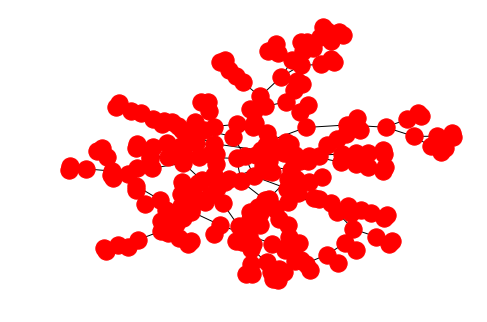

In [30]:
# from subprocess import call
# !pip install pydot
# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
!pip3 install pygraphviz
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
Gtmp = pgv.AGraph('boom_nas_tree.dot')
G = nx.Graph(Gtmp)
nx.draw(G)
plt.show()

In [31]:
import pydot

(graph,) = pydot.graph_from_dot_file('boom_nas_tree.dot')
graph.write_png('boom_nas_decisiontree.png')

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = nas_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = nas_df['nas_labels']
train_data_boom_nas, test_data_boom_nas = get_boom_test_train(nas_df)
X_train_boom_nas = train_data_boom_nas[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_boom_nas = test_data_boom_nas[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_boom_nas = train_data_boom_nas[['nas_labels']]
y_test_boom_nas = test_data_boom_nas[['nas_labels']]

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_boom_nas, y_train_boom_nas.values.ravel())
y_pred = model.predict(X_test_boom_nas)

print(confusion_matrix(y_test_boom_nas,y_pred))
print(classification_report(y_test_boom_nas,y_pred))
print(accuracy_score(y_test_boom_nas, y_pred))

[[ 95   3  97]
 [ 36   0  25]
 [119   4 146]]
              precision    recall  f1-score   support

        -1.0       0.38      0.49      0.43       195
         0.0       0.00      0.00      0.00        61
         1.0       0.54      0.54      0.54       269

   micro avg       0.46      0.46      0.46       525
   macro avg       0.31      0.34      0.32       525
weighted avg       0.42      0.46      0.44       525

0.45904761904761904


In [33]:
r1 = ['1989-03-01','1991-03-28']
r2 = ['1999-11-01','2001-11-30']
r3 = ['2007-06-01','2009-06-30']

def get_recession_test_train(df):
    try:
        df = df.set_index('Date')
    except:
        pass
    train = pd.concat([df.loc[r1[0]:r1[1]],df.loc[r2[0]:r2[1]]])
    test = df.loc[r3[0]:r3[1]]
    return(train, test)

In [34]:
X = nas_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = nas_df['nas_labels']
train_data_recession_nas, test_data_recession_nas = get_recession_test_train(nas_df)
X_train_recession_nas = train_data_recession_nas[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_recession_nas = test_data_recession_nas[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_recession_nas = train_data_recession_nas[['nas_labels']]
y_test_recession_nas = test_data_recession_nas[['nas_labels']]

In [35]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train_recession_nas, y_train_recession_nas)

y_predict = model.predict(X_test_recession_nas)

In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_recession_nas, y_predict)

0.41714285714285715

In [37]:
tree.export_graphviz(model, out_file='recession_nas_tree.dot', feature_names=X.columns)

/bin/sh: 1: pip3: not found


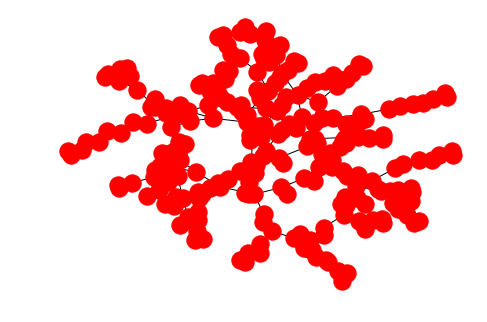

In [38]:
# from subprocess import call
# !pip install pydot
# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
!pip3 install pygraphviz
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
Gtmp = pgv.AGraph('recession_nas_tree.dot')
G = nx.Graph(Gtmp)
nx.draw(G)
plt.show()

In [39]:
import pydot

(graph,) = pydot.graph_from_dot_file('recession_nas_tree.dot')
graph.write_png('recession_nas_decisiontree.png')

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = nas_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = nas_df['nas_labels']
train_data_recession_nas, test_data_recession_nas = get_recession_test_train(nas_df)
X_train_recession_nas = train_data_recession_nas[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_recession_nas = test_data_recession_nas[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_recession_nas = train_data_recession_nas[['nas_labels']]
y_test_recession_nas = test_data_recession_nas[['nas_labels']]

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_recession_nas, y_train_recession_nas.values.ravel())
y_pred = model.predict(X_test_recession_nas)

print(confusion_matrix(y_test_recession_nas,y_pred))
print(classification_report(y_test_recession_nas,y_pred))
print(accuracy_score(y_test_recession_nas, y_pred))

[[103   2 128]
 [ 24   9  53]
 [ 83   5 118]]
              precision    recall  f1-score   support

        -1.0       0.49      0.44      0.47       233
         0.0       0.56      0.10      0.18        86
         1.0       0.39      0.57      0.47       206

   micro avg       0.44      0.44      0.44       525
   macro avg       0.48      0.37      0.37       525
weighted avg       0.46      0.44      0.42       525

0.4380952380952381
